# JEODPP + jupyterlab + extensions

### Extension list

We currently use the following jupyterlab extensions:

- `jupyter-widgets/jupyterlab-manager`
- `jupyter-widgets/jupyterlab-sidecar`
- `bokeh`
- `bqplot`
- `ipycanvas`
- `ipyevents`
- `ipytree`
- `jupyter-leaflet`
- `jupyter-matplotlib`
- `qgrid2`

In order to install these we need to install both python packages and the corresponding jupyterlab extensions

### Install Python dependencies

First, create a venv and install the dependencies from `pyproject.toml` with poetry:

``` bash
python3 -mvenv venv
source venv/bin/activate
poetry install
```

### Install jupyterlab extensions

Run (and wait):

```
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager@2.0.0
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-sidecar@0.5.0
jupyter labextension install --no-build @bokeh/jupyter_bokeh@2.0.4
jupyter labextension install --no-build bqplot@0.5.19
jupyter labextension install --no-build ipycanvas@0.6.1
jupyter labextension install --no-build ipyevents@1.8.1
jupyter labextension install --no-build ipytree@0.1.8
jupyter labextension install --no-build jupyter-leaflet@0.13.2
jupyter labextension install --no-build jupyter-matplotlib@0.7.4
jupyter labextension install --no-build qgrid2@1.1.3
jupyter lab build
```

# Test extensions

The following cell contain info on how to install the latest version of each extension and some code that tests the extensions works.

You should be able to run this notebook until the end without any exceptions.

Note: Maptlotlib requires some manual steps in order to test it properly. Check the last cell for more info

# ipywidgets

### Installation

``` 
poetry add ipywidgets
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager 
jupyter lab build
```

### Testing

More examples can be found here: https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Index.ipynb

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
w = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)
display(w)

# ipycanvas

### Installation

``` bash
poetry add ipycanvas
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager
jupyter labextension install --no-build ipycanvas
jupyter lab build
```

### Test

In [ ]:
from ipycanvas import Canvas

canvas = Canvas(width=200, height=200)

canvas.fill_rect(25, 25, 100, 100)
canvas.clear_rect(45, 45, 60, 60)
canvas.stroke_rect(50, 50, 50, 50)

canvas

# ipyevents

### Installation

``` bash
poetry add ipyevents
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager
jupyter labextension install --no-build ipyevents
jupyter lab build
```

### Test

In [ ]:
from ipywidgets import Label, HTML, HBox, Image, VBox, Box, HBox
from ipyevents import Event 
from IPython.display import display

l = Label('Click or type on me!')
l.layout.border = '2px solid red'

h = HTML('Event info')
d = Event(source=l, watched_events=['click', 'keydown', 'mouseenter'])

def handle_event(event):
    lines = ['{}: {}'.format(k, v) for k, v in event.items()]
    content = '<br>'.join(lines)
    h.value = content

d.on_dom_event(handle_event)
                            
display(l, h)


# ipytree

### Installation

``` bash
poetry add ipytree
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager
jupyter labextension install --no-build ipytree
jupyter lab build
```

### Test

In [ ]:
from ipytree import Node, Tree

tree = Tree(stripes=True)
node1 = Node('node1')
tree.add_node(node1)
node2 = Node('node2')
tree.add_node(node2)
node3 = Node('node3', disabled=True)
node4 = Node('node4')
node5 = Node('node5', [Node('1'), Node('2')])
node2.add_node(node3)
node2.add_node(node4)
node2.add_node(node5)
tree

# tqdm

### Installation

```
poetry add tqdm
```

### Test

In [ ]:
import time
from tqdm.notebook import tqdm
example_iter = [1,2,3,4,5]
for rec in tqdm(example_iter):
    time.sleep(.2)

# Sidecar

### Installation

``` bash
poetry add sidecar
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager 
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-sidecar
jupyter lab build
```

### Test

Running the following cell should create a sidecar window similar to this one: 

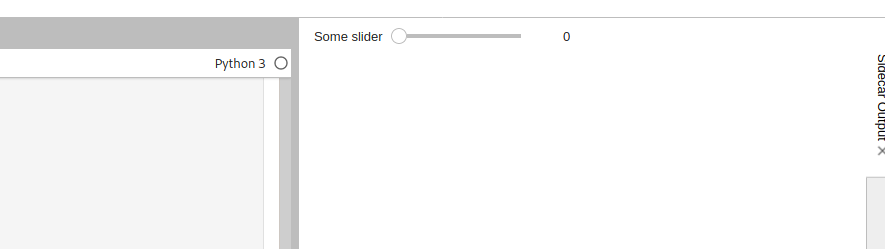

In [ ]:
from sidecar import Sidecar
from ipywidgets import IntSlider

sc = Sidecar(title='Sidecar Output')
sl = IntSlider(description='Some slider')
with sc:
    display(sl)
    

# Ipyleaflet

### Installation

``` bash
poetry add ipyleaflet
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager 
jupyter labextension install --no-build jupyter-leaflet
jupyter lab build
```

### Test

In [ ]:
from ipytree import Tree, Node
from ipyleaflet import Map, Marker
from ipywidgets import HBox, link, Layout

m = Map(center=[47.51, 4.04], zoom=4)
tree = Tree()
tree.layout.width = '40%'
box = HBox([tree, m])

markers_node = Node('Markers')
tree.add_node(markers_node)

layers_node = Node('Layers', icon='map')
tree.add_node(layers_node)

cities = [
    {'name': 'London', 'location': [51.5074, 0.1278]},
    {'name': 'Paris', 'location': [48.8566, 2.3522]},
    {'name': 'Barcelona', 'location': [41.31, 2.109]}
]

for city in cities:
    marker = Marker(location=city.get('location'))
    node = Node(city.get('name'), icon='map-marker')

    link((marker, 'visible'), (node, 'selected'))

    m.add_layer(marker);
    markers_node.add_node(node)
    
box

# Qgrid

### Installation

``` bash
poetry add qgrid
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager 
jupyter labextension install --no-build qgrid2
jupyter lab build
```

### Test

In [ ]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'A' : pd.Series(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09'],index=list(range(9)),dtype='datetime64[ns]'),
    'B' : pd.Series(randn(9),index=list(range(9)),dtype='float32'),
    'C' : pd.Categorical(["washington", "adams", "washington", "madison", "lincoln","jefferson", "hamilton", "roosevelt", "kennedy"]),
    'D' : ["foo", "bar", "buzz", "bippity","boppity", "foo", "foo", "bar", "zoo"] })
df_types['E'] = df_types['D'] == 'foo'
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=True)
qgrid_widget

# Bokeh

### Installation

``` bash
poetry add bokeh
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager 
jupyter labextension install --no-build @bokeh/jupyter_bokeh
jupyter lab build
```

### Test

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, show, output_notebook

# You just need to call this once
output_notebook()

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]


# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Temp.", line_width=2)

# show the results
show(p)

# bqplot

### Installation

``` bash
poetry add bqplot
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager
jupyter labextension install --no-build bqplot
jupyter lab build
```

### Test 1 (using the pyplot API)

In [ ]:
import numpy as np
from bqplot import pyplot as plt

plt.figure(1, title='Line Chart')
np.random.seed(0)
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))
plt.plot(x, y)
plt.show();

### Test 2 (using the native bqplot)

In [ ]:
import numpy as np
from IPython.display import display
from bqplot import (
    OrdinalScale, LinearScale, Bars, Lines, Axis, Figure
)

size = 20
np.random.seed(0)

x_data = np.arange(size)

x_ord = OrdinalScale()
y_sc = LinearScale()

bar = Bars(x=x_data, y=np.random.randn(2, size), scales={'x': x_ord, 'y':
y_sc}, type='stacked')
line = Lines(x=x_data, y=np.random.randn(size), scales={'x': x_ord, 'y': y_sc},
             stroke_width=3, colors=['red'], display_legend=True, labels=['Line chart'])

ax_x = Axis(scale=x_ord, grid_lines='solid', label='X')
ax_y = Axis(scale=y_sc, orientation='vertical', tick_format='0.2f',
            grid_lines='solid', label='Y')

Figure(marks=[bar, line], axes=[ax_x, ax_y], title='API Example',
       legend_location='bottom-right')

# Matplotlib

### Installation

``` bash
poetry add matplotlib
poetry add ipympl
# There is no ipympl specific extension, but you still need to run build!
jupyter labextension install --no-build @jupyter-widgets/jupyterlab-manager 
jupyter labextension install --no-build jupyterlab-matplotlib
jupyter lab build
```

### Modes

There are several different modes when plotting using matplotlib:

```
%matplotlib
%matplotlib inline
%matplotlib notebook
%matplotlib widget
%matplotlib ipympl
```

- `%matplotlib inline` is the default mode on jupyterlab. it is not interactive. It justs plots a png.
- `%matplotlib` is the standard/legacy matplotlib behavior. I.e. it displays the image in a pop-up window.
- `%matplotlib widget` and `%matplotlib ipympl` seem to be giving the same output. i am not sure if there are any differences.
- I couldn't get `%matplotlib notebook` to work. It might be deprecated/no longer supported, but I haven't found any references


### Test


**DISCLAIMER**

Swithcing between modes is not really supported. 
It is recommended to set the mode once at the beginning of each notebook!

Restart the kernel, choose a mode, execute it and the execute the code cell that follows.

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.show();

In [ ]:
%matplotlib ipympl

In [ ]:
%matplotlib widget

In [ ]:
%matplotlib notebook

In [ ]:
%matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.show();